In [47]:
# Import necessary libraries

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix
import seaborn as sns

### a. Get the Data:

1. Import and Load the dataset

In [48]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [49]:
# Check the shape of dataset
print(x_train.shape)

(60000, 28, 28)


In [50]:
# Dictionaries to store the fashion_mnist datasets
unsupervised_hyeri = {}
supervised_hyeri = {}

# Split data into unsupervised and supervised sets
unsupervised_hyeri['images'] = x_train[:60000]
supervised_hyeri['images'] = x_test[:10000]
supervised_hyeri['labels'] = y_test[:10000]

# Check the lengths of the unsupervised and supervised sets
print(f"The length of unsupervised sets: {len(unsupervised_hyeri['images'])}")
print(f"The length of supervised sets: {len(supervised_hyeri['images'])}")

The length of unsupervised sets: 60000
The length of supervised sets: 10000


### b. Data Pre-processing:

1. Normalization:

In [51]:
# Normalize pixel values to 0-1 range
unsupervised_hyeri['images'] = unsupervised_hyeri['images'] / 255.0
supervised_hyeri['images'] = supervised_hyeri['images'] / 255.0

2. One-hot Encoding:

In [52]:
# Convert labels to one-hot encoded format
supervised_hyeri['labels'] = tf.keras.utils.to_categorical(supervised_hyeri['labels'], num_classes=10)

In [53]:
# Print out the shape of each dataset
print("The shape of the datasets\n")
print("unsupervised_images:", unsupervised_hyeri['images'].shape)
print("supervised_images:", supervised_hyeri['images'].shape)
print("supervised_labels:", supervised_hyeri['labels'].shape)

The shape of the datasets

unsupervised_images: (60000, 28, 28)
supervised_images: (10000, 28, 28)
supervised_labels: (10000, 10)


### c. Data Preparation (Training, Validation, Testing):

1. Split the Unsupervised Dataset:

In [54]:
# Random seed based on last two digits of student ID
random_seed = 60

# Split unsupervised data into training and validation sets
X_train_unsupervised, X_val_unsupervised = train_test_split(unsupervised_hyeri['images'],
                                                            test_size=0.05,
                                                            random_state=random_seed)

# Use astype function to keep the original shape of dataset
X_train_unsupervised_reshaped = X_train_unsupervised.astype(np.float32).reshape(-1, 28 * 28)
X_val_unsupervised_reshaped = X_val_unsupervised.astype(np.float32).reshape(-1, 28 * 28)

# Store in DataFrames
unsupervised_train_hyeri = pd.DataFrame(X_train_unsupervised_reshaped)
unsupervised_val_hyeri = pd.DataFrame(X_val_unsupervised_reshaped)

In [55]:
print("Original dataset for unsupervised: ", X_train_unsupervised.shape)
print("Reshaped dataset for unsupervised: ", X_train_unsupervised_reshaped.shape)

Original dataset for unsupervised:  (57000, 28, 28)
Reshaped dataset for unsupervised:  (57000, 784)


Supervised Random Discard:

In [56]:
# Discard 7,000 random samples from supervised data
supervised_hyeri['images'], _, supervised_hyeri['labels'], _ = train_test_split(supervised_hyeri['images'],
                                                                                supervised_hyeri['labels'],
                                                                                test_size=0.7,
                                                                                shuffle=True,
                                                                                random_state=random_seed)


Supervised Split:

In [57]:
# Split remaining supervised data into training, validation, and testing sets
X_train_hyeri, X_test_hyeri, y_train_hyeri, y_test_hyeri = train_test_split(supervised_hyeri['images'], supervised_hyeri['labels'], test_size=0.2, random_state=random_seed)
X_train_hyeri, X_val_hyeri, y_train_hyeri, y_val_hyeri = train_test_split(X_train_hyeri, y_train_hyeri, test_size = 0.25, random_state=random_seed)

In [58]:
# Print out the shapes
print("unsupervised_train:", unsupervised_train_hyeri.shape)
print("unsupervised_val:", unsupervised_val_hyeri.shape)
print("x_train:", X_train_hyeri.shape)
print("x_val:", X_val_hyeri.shape)
print("x_test:", X_test_hyeri.shape)
print("y_train:", y_train_hyeri.shape)
print("y_val:", y_val_hyeri.shape)
print("y_test:", y_test_hyeri.shape)

unsupervised_train: (57000, 784)
unsupervised_val: (3000, 784)
x_train: (1800, 28, 28)
x_val: (600, 28, 28)
x_test: (600, 28, 28)
y_train: (1800, 10)
y_val: (600, 10)
y_test: (600, 10)


### d. Build, Train, and Validate a Baseline CNN Model:

Building the Model:

In [59]:
# Set model name and image size
image_size = (28, 28, 1)  # Assuming grayscale images

# Create the model architecture
cnn_v1_model_hyeri = tf.keras.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2, input_shape=image_size),
    layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])


Compiling the Model:

In [60]:
# Compile the model
cnn_v1_model_hyeri.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Model Summary and Diagram:

In [61]:
# Print model summary
cnn_v1_model_hyeri.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 flatten_2 (Flatten)         (None, 392)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               39300     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 41630 (162.62 KB)
Trainable params: 41630 (162.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


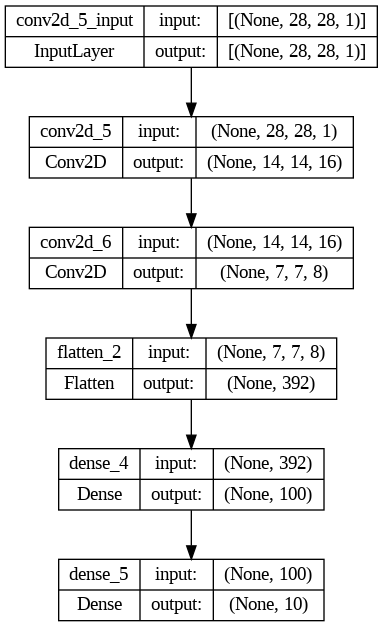

In [62]:
# Draw the diagram for the summary
plot_model(cnn_v1_model_hyeri, show_shapes=True, show_layer_names=True)

Training and Validation:

In [63]:
# Train and validate the model
cnn_v1_history_hyeri = cnn_v1_model_hyeri.fit(X_train_hyeri,
                                              y_train_hyeri,
                                              epochs=10,
                                              batch_size=256,
                                              validation_data=(X_val_hyeri, y_val_hyeri))


Epoch 1/10
8/8 [==============================] - 1s 32ms/step - loss: 2.2472 - accuracy: 0.1467 - val_loss: 2.1263 - val_accuracy: 0.3733
Epoch 2/10
8/8 [==============================] - 0s 10ms/step - loss: 2.0078 - accuracy: 0.4500 - val_loss: 1.7908 - val_accuracy: 0.5400
Epoch 3/10
8/8 [==============================] - 0s 11ms/step - loss: 1.6337 - accuracy: 0.5544 - val_loss: 1.3694 - val_accuracy: 0.6100
Epoch 4/10
8/8 [==============================] - 0s 9ms/step - loss: 1.2740 - accuracy: 0.5878 - val_loss: 1.0833 - val_accuracy: 0.6300
Epoch 5/10
8/8 [==============================] - 0s 10ms/step - loss: 1.0448 - accuracy: 0.6200 - val_loss: 0.8756 - val_accuracy: 0.7017
Epoch 6/10
8/8 [==============================] - 0s 10ms/step - loss: 0.8890 - accuracy: 0.6928 - val_loss: 0.8215 - val_accuracy: 0.7033
Epoch 7/10
8/8 [==============================] - 0s 8ms/step - loss: 0.8103 - accuracy: 0.7022 - val_loss: 0.7248 - val_accuracy: 0.7550
Epoch 8/10
8/8 [=============

### e. Test and Analyze the Baseline Model:


Plot Training vs. Validation Accuracy:

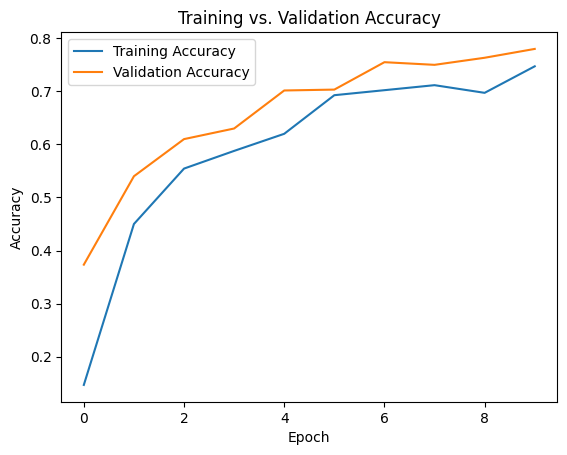

In [64]:
# Plot accuracy
plt.plot(cnn_v1_history_hyeri.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_v1_history_hyeri.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()
plt.show()


Evaluate on Test Set:

In [65]:
# Evaluate on test set
test_loss, test_acc = cnn_v1_model_hyeri.evaluate(X_test_hyeri, y_test_hyeri, verbose=2)
print('\nTest accuracy:', test_acc)


19/19 - 0s - loss: 0.7699 - accuracy: 0.7383 - 58ms/epoch - 3ms/step

Test accuracy: 0.7383333444595337


Create Predictions:

In [66]:
# Create predictions
cnn_predictions_hyeri = cnn_v1_model_hyeri.predict(X_test_hyeri)


19/19 [==============================] - 0s 2ms/step


Plot Confusion Matrix:

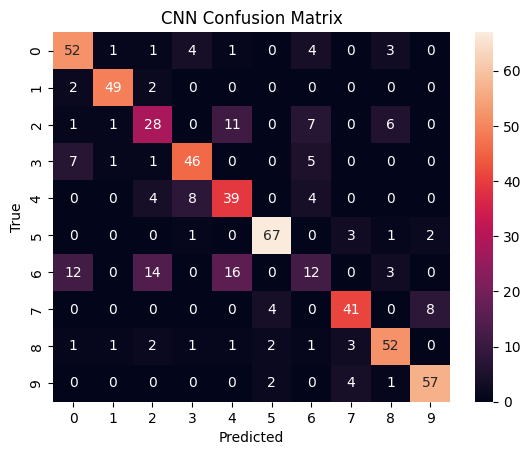

In [67]:
# Create confusion matrix
cm_v1 = confusion_matrix(y_test_hyeri.argmax(axis=1), cnn_predictions_hyeri.argmax(axis=1))

# Plot using seaborn
sns.heatmap(cm_v1, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('CNN Confusion Matrix')
plt.show()


### f. Add random noise to unsupervised dataset:

In [68]:
# Define noise factor and random seed
noise_factor = 0.2
random_seed = 60

# Add noise to training and validation data
x_train_noisy_hyeri = X_train_unsupervised + tf.random.normal(shape=X_train_unsupervised.shape, mean=0.0, stddev=noise_factor, seed=random_seed)
x_val_noisy_hyeri = X_val_unsupervised + tf.random.normal(shape=X_val_unsupervised.shape, mean=0.0, stddev=noise_factor, seed=random_seed)

# Clip values to range 0-1
x_train_noisy_hyeri = tf.clip_by_value(x_train_noisy_hyeri, clip_value_min=0.0, clip_value_max=1.0)
x_val_noisy_hyeri = tf.clip_by_value(x_val_noisy_hyeri, clip_value_min=0.0, clip_value_max=1.0)

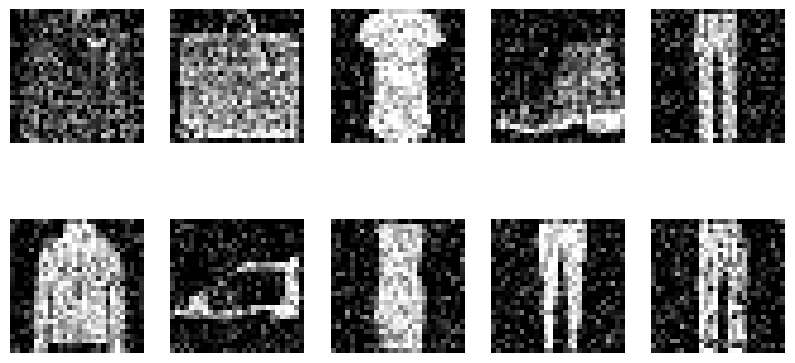

In [69]:
# Plot first 10 images from noisy validation set
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_val_noisy_hyeri[i], cmap='gray')
    plt.axis('off')
plt.show()

### g. Build and pretrain Autoencoder:

In [70]:
# Define input layer based on image size
inputs_hyeri = layers.Input(shape=(28, 28, 1))

In [71]:
# Encoder section
e_hyeri = []

e_hyeri.append(layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2)(inputs_hyeri))
e_hyeri.append(layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)(e_hyeri[0]))


# Decoder section
d_hyeri = []

d_hyeri.append(layers.Conv2DTranspose(8, (3, 3), activation='relu', padding='same', strides=2)(e_hyeri[1]))
d_hyeri.append(layers.Conv2DTranspose(16, (3, 3), activation='relu', padding='same', strides=2)(d_hyeri[0]))
d_hyeri.append(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(d_hyeri[1]))


In [72]:
# Autoencoder model
autoencoder_hyeri = models.Model(inputs=inputs_hyeri, outputs=d_hyeri[-1])

In [73]:
# Compile autoencoder
autoencoder_hyeri.compile(optimizer='adam', loss='mse')

In [74]:
# Print summary
autoencoder_hyeri.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 conv2d_transpose_2 (Conv2D  (None, 14, 14, 8)         584       
 Transpose)                                                      
                                                                 
 conv2d_transpose_3 (Conv2D  (None, 28, 28, 16)        1168      
 Transpose)                                                      
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 1)         145 

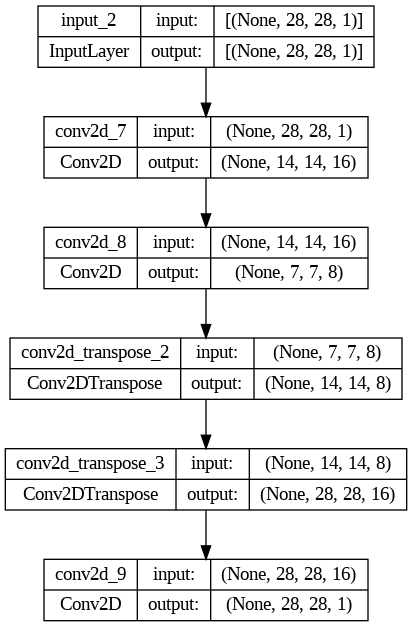

In [75]:
# Draw the diagram for the summary
plot_model(autoencoder_hyeri, show_shapes=True, show_layer_names=True)

In [76]:
# Train autoencoder
autoencoder_history_hyeri = autoencoder_hyeri.fit(x_train_noisy_hyeri,
                                                  X_train_unsupervised,
                                                  epochs=10,
                                                  batch_size=256,
                                                  shuffle=True,
                                                  validation_data=(x_val_noisy_hyeri, X_val_unsupervised))


Epoch 1/10
223/223 [==============================] - 3s 7ms/step - loss: 0.0551 - val_loss: 0.0159
Epoch 2/10
223/223 [==============================] - 1s 6ms/step - loss: 0.0140 - val_loss: 0.0125
Epoch 3/10
223/223 [==============================] - 1s 6ms/step - loss: 0.0117 - val_loss: 0.0109
Epoch 4/10
223/223 [==============================] - 1s 6ms/step - loss: 0.0106 - val_loss: 0.0101
Epoch 5/10
223/223 [==============================] - 1s 6ms/step - loss: 0.0100 - val_loss: 0.0096
Epoch 6/10
223/223 [==============================] - 1s 6ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 7/10
223/223 [==============================] - 2s 7ms/step - loss: 0.0091 - val_loss: 0.0089
Epoch 8/10
223/223 [==============================] - 2s 7ms/step - loss: 0.0088 - val_loss: 0.0085
Epoch 9/10
223/223 [==============================] - 1s 6ms/step - loss: 0.0085 - val_loss: 0.0083
Epoch 10/10
223/223 [==============================] - 1s 6ms/step - loss: 0.0083 - val_loss: 0.0081

In [77]:
# Predict on validation set
autoencoder_predictions_hyeri = autoencoder_hyeri.predict(X_val_unsupervised)

94/94 [==============================] - 0s 2ms/step


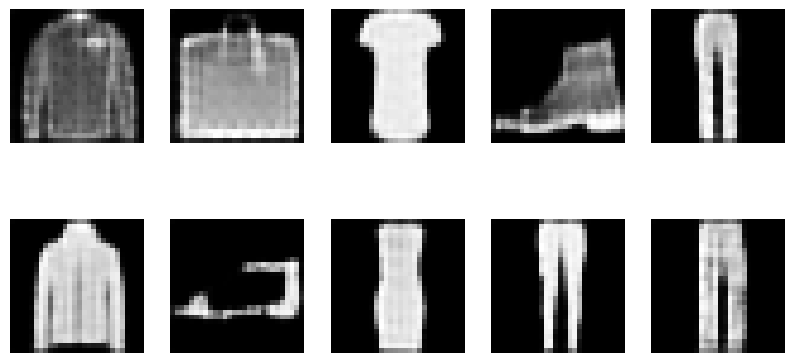

In [78]:
# Plot first 10 predicted images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(autoencoder_predictions_hyeri[i][:, :, 0], cmap='gray')  # Remove last dimension for grayscale
    plt.axis('off')
plt.show()


### h. Build and perform transfer learning on a CNN with the Autoencoder:


In [79]:
# Extract encoder section from Autoencoder
encoder_section_hyeri = tf.keras.Model(inputs=inputs_hyeri, outputs=d_hyeri[-1])

In [80]:
# Build CNN model for transfer learning
cnn_v2_hyeri = tf.keras.Sequential([
    encoder_section_hyeri,
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [81]:
# Compile CNN
cnn_v2_hyeri.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [82]:
# Print summary
cnn_v2_hyeri.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_3 (Functional)        (None, 28, 28, 1)         3217      
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 82727 (323.15 KB)
Trainable params: 82727 (323.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


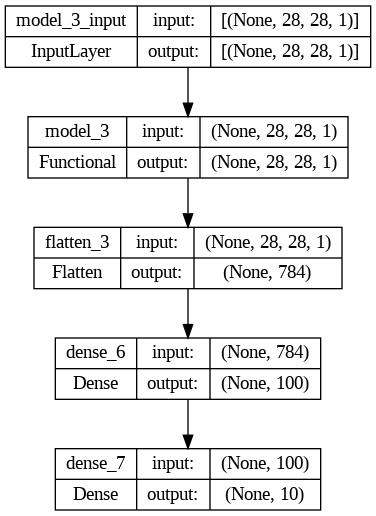

In [83]:
# Draw the diagram for the summary
plot_model(cnn_v2_hyeri, show_shapes=True, show_layer_names=True)

In [84]:
# fit the model to our train and val supervised dataset
cnn_v2_history_hyeri = cnn_v2_hyeri.fit(X_train_hyeri,
                                        y_train_hyeri,
                                        epochs=10,
                                        batch_size=256,
                                        validation_data=(X_val_hyeri, y_val_hyeri))

Epoch 1/10
8/8 [==============================] - 3s 44ms/step - loss: 2.0049 - accuracy: 0.3883 - val_loss: 1.3592 - val_accuracy: 0.5817
Epoch 2/10
8/8 [==============================] - 0s 13ms/step - loss: 1.1476 - accuracy: 0.5989 - val_loss: 0.9741 - val_accuracy: 0.6267
Epoch 3/10
8/8 [==============================] - 0s 34ms/step - loss: 0.9629 - accuracy: 0.6378 - val_loss: 0.8337 - val_accuracy: 0.6983
Epoch 4/10
8/8 [==============================] - 0s 39ms/step - loss: 0.8411 - accuracy: 0.6844 - val_loss: 0.7606 - val_accuracy: 0.7317
Epoch 5/10
8/8 [==============================] - 0s 23ms/step - loss: 0.7794 - accuracy: 0.7150 - val_loss: 0.7269 - val_accuracy: 0.7550
Epoch 6/10
8/8 [==============================] - 0s 30ms/step - loss: 0.7045 - accuracy: 0.7478 - val_loss: 0.6817 - val_accuracy: 0.7533
Epoch 7/10
8/8 [==============================] - 0s 15ms/step - loss: 0.6752 - accuracy: 0.7528 - val_loss: 0.6540 - val_accuracy: 0.7800
Epoch 8/10
8/8 [===========

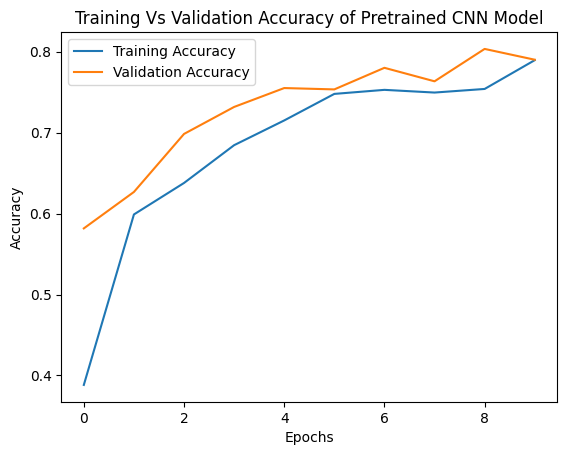

In [85]:
# Plot Training Vs Validation Accuracy for the pretrained CNN model
plt.plot(cnn_v2_history_hyeri.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_v2_history_hyeri.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Vs Validation Accuracy of Pretrained CNN Model')
plt.legend()
plt.show()

In [86]:
# Evaluate the pretrained CNN model on test dataset
test_loss_pretrained, test_accuracy_pretrained = cnn_v2_hyeri.evaluate(X_test_hyeri, y_test_hyeri)
print(f"Test Accuracy (Pretrained Model): {test_accuracy_pretrained}")

19/19 [==============================] - 0s 3ms/step - loss: 0.6812 - accuracy: 0.7750
Test Accuracy (Pretrained Model): 0.7749999761581421


In [87]:
# Make predictions on test dataset using pretrained CNN model
cnn_predictions_pretrained_hyeri = cnn_v2_hyeri.predict(X_test_hyeri)


19/19 [==============================] - 0s 3ms/step


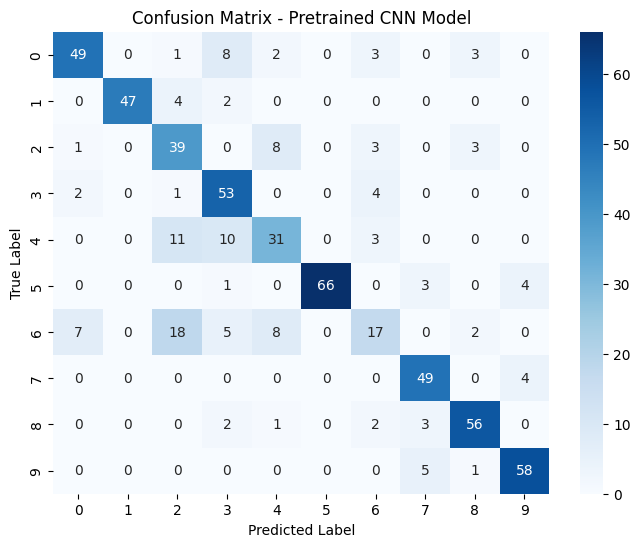

In [88]:
# Confusion matrix for pretrained CNN model
cm_pretrained = confusion_matrix(
    np.argmax(y_test_hyeri, axis=1),
    np.argmax(cnn_predictions_pretrained_hyeri, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pretrained, annot=True, fmt='g', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Pretrained CNN Model')
plt.show()

### j. Compare the performance of the baseline CNN model to the pretrained model in your report


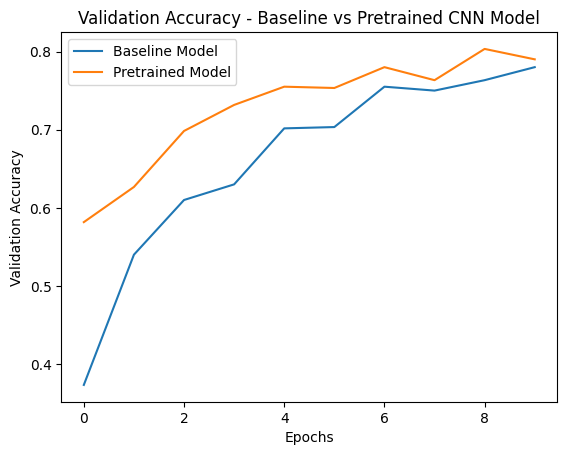

In [89]:
# Plot Validation Accuracy for Baseline vs Pretrained model
plt.plot(cnn_v1_history_hyeri.history['val_accuracy'], label='Baseline Model')
plt.plot(cnn_v2_history_hyeri.history['val_accuracy'], label='Pretrained Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy - Baseline vs Pretrained CNN Model')
plt.legend()
plt.show()

In [90]:
# Compare and analyze test accuracy for Baseline vs Pretrained model
print(f"Test Accuracy (Baseline Model): {test_acc}")
print(f"Test Accuracy (Pretrained Model): {test_accuracy_pretrained}")

Test Accuracy (Baseline Model): 0.7383333444595337
Test Accuracy (Pretrained Model): 0.7749999761581421
